# Thinking in tensors, writing in PyTorch

A hands-on course by [Piotr Migdał](https://p.migdal.pl) (2019). Version 0.2.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]( https://colab.research.google.com/github/stared/thinking-in-tensors-writing-in-pytorch/blob/master/extra/Word%20vectors.ipynb)


## Extra: Word vectors

**VERY WORK IN PROGRESS**

### Reading

For a general reading, see:

* [king - man + woman is queen; but why?](https://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html)
* [Word2vec in PyTorch](https://adoni.github.io/2017/11/08/word2vec-pytorch/)

### Notes

We use the smallest, 50-dimensional, uncased GloVe word embedding:

* [GloVe: Global Vectors for Word Representation by Stanford](https://nlp.stanford.edu/projects/glove/)

Other popular pre-trained word embeddings:

* [word2vec by Google](https://code.google.com/archive/p/word2vec/)
* [fastText by Facebook](https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) (multilingual)

See also:

* [Aligning the fastText vectors of 78 languages](https://github.com/Babylonpartners/fastText_multilingual)
* [gensim-data](https://github.com/RaRe-Technologies/gensim-data) - data repository for pretrained NLP models and NLP corpora.



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
wv = pd.read_table("./data/glove.6B.50d.txt",
                      delimiter=" ", header=None, index_col=0, quoting=3)

In [3]:
wv.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044




$$\vec{v}_{\text{julia}} = [0.36, 1.18, -0.10, \ldots, 0.94]$$

In [5]:
wv.loc["julia"].values

array([ 0.35642  ,  1.1834   , -0.10387  ,  0.22215  ,  0.14176  ,
        1.0903   , -0.21405  ,  0.25616  , -0.60769  , -0.38742  ,
       -0.43919  ,  0.90377  , -0.44413  ,  0.34396  ,  0.60879  ,
       -0.1483   , -0.0039533, -0.4284   ,  0.31894  ,  0.2155   ,
        0.22579  ,  0.73451  ,  0.3014   ,  0.62373  ,  1.0282   ,
       -0.73192  ,  0.2864   , -0.35082  , -0.49946  , -0.29059  ,
        0.35281  ,  0.39814  ,  0.26861  , -0.42949  , -0.29573  ,
       -0.39567  , -0.20052  ,  0.74438  ,  0.37396  , -0.60044  ,
        0.34219  ,  0.96909  ,  0.53807  , -1.321    , -0.024624 ,
        0.66218  , -0.30228  , -1.7046   ,  0.63482  ,  0.93558  ])

In [6]:
def latex_vector(series, first=3, last=1):
    from IPython.display import Math
    
    if len(series) < first + last:
        raise Exception("len(series) < first + last")
    
    s = r"\vec{v}_{\text{" +  series.name + r"}} = ["
    
    vs_fmtd = ["{:.2f}".format(v) for v in series.values[:first]]
    if len(series) > first + last:
        vs_fmtd.append(r"\ldots")
    vs_fmtd += ["{:.2f}".format(v) for v in series.values[-last:]]
            
    s += ", ".join(vs_fmtd)
    s += "]"

    return Math(s) 

In [7]:
latex_vector(wv.loc["julia"])

<IPython.core.display.Math object>

In [8]:
words = set(wv.index)

In [9]:
"daniel" in words

True

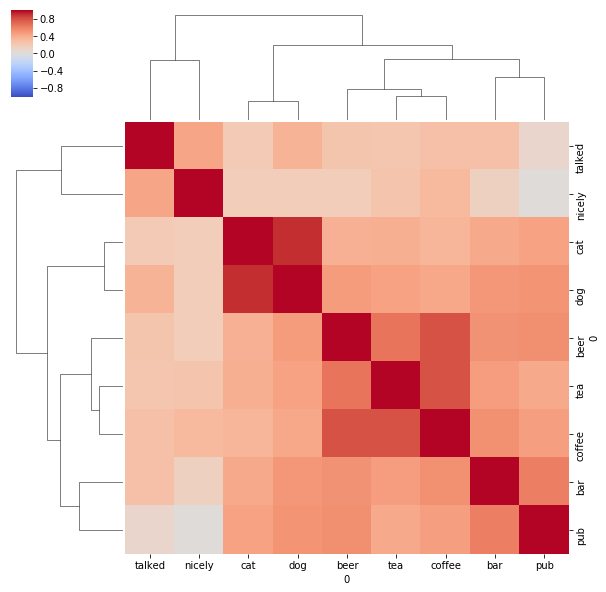

In [10]:
correlations = wv.loc[["cat", "dog", "bar", "pub", "beer", "tea", "coffee", "talked", "nicely"]].transpose().corr()
sns.clustermap(correlations, vmin=-1., vmax=1., cmap="coolwarm")

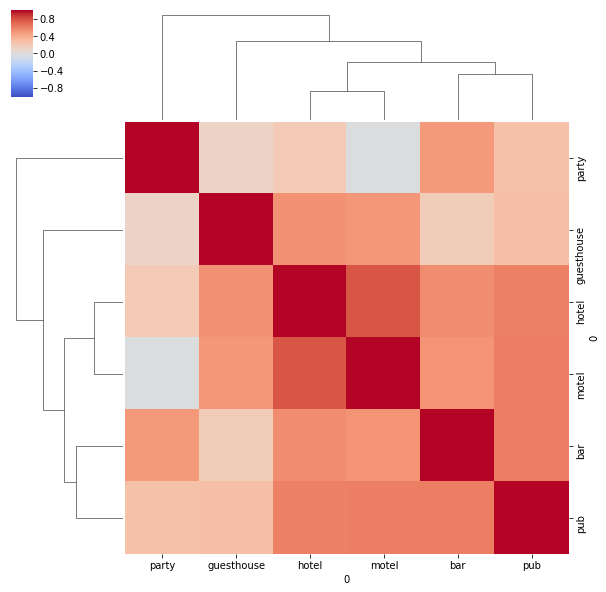

In [11]:
correlations = wv.loc[["hotel", "motel", "guesthouse", "bar", "pub", "party"]].transpose().corr()
sns.clustermap(correlations, vmin=-1., vmax=1., cmap="coolwarm")

In [12]:
np.dot(wv.loc["kate"],  wv.loc["he"] - wv.loc["she"])

-6.586906884007

In [13]:
np.dot(wv.loc["john"],  wv.loc["he"] - wv.loc["she"])

2.5265921501259196

In [14]:
names = ["kate", "catherine", "john", "mark", "peter", "anna", "julia", "jacob", "jake",
         "richard", "ted", "theodore", "sue", "susanne", "suzanne", "susan", "mary",
         "leo", "leonard", "alexander", "alexandra", "alex", "sasha"]
all([name in words for name in names])

True

In [15]:
gender = wv.loc["he"] - wv.loc["she"]

In [16]:
wv.loc[names].dot(gender).sort_values()

0
anna        -7.344199
kate        -6.586907
susan       -5.699029
julia       -5.126295
mary        -4.743954
sasha       -4.371697
catherine   -4.177077
alexandra   -4.109371
suzanne     -3.833959
sue         -2.976699
susanne     -2.352316
jake        -1.061410
alex        -0.501445
ted         -0.465928
leonard      0.742049
peter        0.865114
jacob        0.987405
richard      1.340372
leo          2.063482
mark         2.316420
alexander    2.471270
theodore     2.525033
john         2.526592
dtype: float64

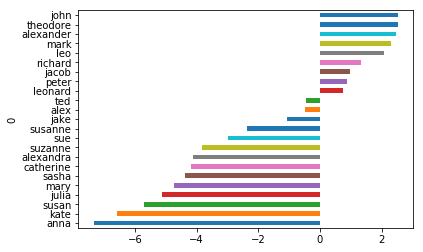

In [17]:
wv.loc[names].dot(gender).sort_values().plot.barh()

In [18]:
diminutive = wv.loc["kate"] - wv.loc["catherine"]

In [19]:
proj = pd.DataFrame([gender, diminutive], index=["gender", "diminutive"]).transpose()

In [20]:
df_plot = wv.loc[names].dot(proj).sort_values(by="diminutive")
df_plot

,gender,diminutive
0,,
catherine,-4.177077,-7.004076
alexander,2.471270,-4.733500
alexandra,-4.109371,-4.541007
theodore,2.525033,-3.765326
leo,2.063482,-3.650150
mary,-4.743954,-3.394519
peter,0.865114,-2.686588
suzanne,-3.833959,-2.250602
john,2.526592,-2.064688


In [21]:
some_words = ["good", "bad", "ok", "not", "ugly", "beautiful", "awesome", "!", "?"]
assert(all([word in words for word in some_words]))

awesomeness = wvn.loc["awesome"] - wvn.loc["awful"]
wvn.loc[some_words].dot(awesomeness).sort_values()

NameError: name 'wvn' is not defined

## Plots

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wv.loc[names])

In [ ]:
plt.plot(X_pca[:, 0], X_pca[:, 1], '.')
for i, name in enumerate(names):
    plt.annotate(name, X_pca[i])

In [ ]:
tsne = TSNE(n_components=2, perplexity=3.)
X_tsne = tsne.fit_transform(wv.loc[names])

In [ ]:
plt.plot(X_tsne[:, 0], X_tsne[:, 1], '.')
for i, name in enumerate(names):
    plt.annotate(name, X_tsne[i])

## Close

In [ ]:
# normalize your data
wv.dot(wv.loc["dog"]).sort_values(ascending=False).head(10)

In [ ]:
# let's normalize data
lens = (wv**2).sum(axis=1)
wvn = wv.div(np.sqrt(lens), axis='index')

In [ ]:
wvn.dot(wvn.loc["dog"]).sort_values(ascending=False).head(20)

In [ ]:
wvn.dot(wvn.loc["dog"]).sort_values(ascending=False).tail(20)

In [ ]:
wvn.dot(wvn.loc["king"] - wvn.loc["man"] + wvn.loc["woman"]).sort_values(ascending=False).head(20)

In [ ]:
wvn.dot(wvn.loc["kissed"] - wvn.loc["kiss"] + wvn.loc["eat"]).sort_values(ascending=False).head(20)

## Extremes

In [ ]:
temp_diff = wvn.loc["hot"] - wvn.loc["cold"]
temp_avg = (wvn.loc["hot"] + wvn.loc["cold"]) / 2.
proj = pd.DataFrame([temp_diff, temp_avg], index=["temp_diff", "temp_avg"]).transpose()

In [ ]:
temp_all = wvn.dot(proj).sort_values(by="temp_avg", ascending=False)

In [ ]:
temp_all.head(20)

In [ ]:
temp_all.head(200).sort_values(by="temp_diff", ascending=False)